In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import collections
import statsmodels.api as sm
from collections import Counter
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [32]:
df = pd.read_csv(r"C:\Users\sk062\OneDrive\デスクトップ\西新宿 自動運転アンケート2025.2.21~24.csv　108名バージョン\西新宿 自動運転アンケート2025.2.21~24.csv")

df.iloc[:, 6] = df.iloc[:, 6].replace('①希望する', 1)
df.iloc[:, 6] = df.iloc[:, 6].replace('②どちらかというと希望する', 2)
df.iloc[:, 6] = df.iloc[:, 6].replace('③どちらかというと希望しない', 3)
df.iloc[:, 6] = df.iloc[:, 6].replace('④希望しない', 4)

df.iloc[:, 9] = df.iloc[:, 9].replace('①週５回以上', 1)
df.iloc[:, 9] = df.iloc[:, 9].replace('②週３～４回', 2)
df.iloc[:, 9] = df.iloc[:, 9].replace('③週１～２回', 3)
df.iloc[:, 9] = df.iloc[:, 9].replace('④月に１～３回', 4)
df.iloc[:, 9] = df.iloc[:, 9].replace('⑤年に数回以下', 5)

df.iloc[:, 10] = df.iloc[:, 10].replace('①１００円以下', 1)
df.iloc[:, 10] = df.iloc[:, 10].replace('②１５０円', 2)
df.iloc[:, 10] = df.iloc[:, 10].replace('③２００円', 3)
df.iloc[:, 10] = df.iloc[:, 10].replace('④２５０円', 4)
df.iloc[:, 10] = df.iloc[:, 10].replace('⑤３００円', 5)

df.iloc[:, 11] = df.iloc[:, 11].replace('①危険を感じた', 1)
df.iloc[:, 11] = df.iloc[:, 11].replace('②危険を感じなかった', 2)

df.iloc[:, 13] = df.iloc[:, 13].replace('①興味本位', 1)
df.iloc[:, 13] = df.iloc[:, 13].replace('②家族・友人に誘われたから', 2)
df.iloc[:, 13] = df.iloc[:, 13].replace('③試しに乗ってみた（視察含む）', 3)
df.iloc[:, 13] = df.iloc[:, 13].replace('⑤自動運動システムに興味があった', 5)
df.iloc[:, 13] = df.iloc[:, 13].replace('⑥通勤（都庁）', 6)
df.iloc[:, 13] = df.iloc[:, 13].replace('⑦通勤（都庁以外）', 7)
df.iloc[:, 13] = df.iloc[:, 13].replace('⑧業務', 8)
df.iloc[:, 13] = df.iloc[:, 13].replace('⑨趣味・コミュニティ活動', 9)
df.iloc[:, 13] = df.iloc[:, 13].replace('⑩通院/健康関係', 10)
df.iloc[:, 13] = df.iloc[:, 13].replace('⑪行政機関利用', 11)
df.iloc[:, 13] = df.iloc[:, 13].replace('⑫金融/郵便関係利用', 12)
df.iloc[:, 13] = df.iloc[:, 13].replace('⑬外食', 13)
df.iloc[:, 13] = df.iloc[:, 13].replace('⑭日用品の購入', 14)
df.iloc[:, 13] = df.iloc[:, 13].replace('⑮（日用品を除く）物品の購入/サービス契約', 15)
df.iloc[:, 13] = df.iloc[:, 13].replace('⑯仕事以外の方（知人/友人/家族等）の面会', 16)

df.iloc[:, 19] = df.iloc[:, 19].replace('①全面的に協力できる', 1)
df.iloc[:, 19] = df.iloc[:, 19].replace('②やや協力できる', 2)
df.iloc[:, 19] = df.iloc[:, 19].replace('③普通', 3)
df.iloc[:, 19] = df.iloc[:, 19].replace('④やや協力できない', 4)
df.iloc[:, 19] = df.iloc[:, 19].replace('⑤全面的に協力できない', 5)

df.iloc[:, 20] = df.iloc[:, 20].replace('①全面的に協力できる', 1)
df.iloc[:, 20] = df.iloc[:, 20].replace('②やや協力できる', 2)
df.iloc[:, 20] = df.iloc[:, 20].replace('③普通', 3)
df.iloc[:, 20] = df.iloc[:, 20].replace('④やや協力できない', 4)
df.iloc[:, 20] = df.iloc[:, 20].replace('⑤全面的に協力できない', 5)

df.iloc[:, 21] = df.iloc[:, 21].replace('①全面的に協力できる', 1)
df.iloc[:, 21] = df.iloc[:, 21].replace('②やや協力できる', 2)
df.iloc[:, 21] = df.iloc[:, 21].replace('③普通', 3)
df.iloc[:, 21] = df.iloc[:, 21].replace('④やや協力できない', 4)
df.iloc[:, 21] = df.iloc[:, 21].replace('⑤全面的に協力できない', 5)

df.iloc[:, 22] = df.iloc[:, 22].replace('①全面的に協力できる', 1)
df.iloc[:, 22] = df.iloc[:, 22].replace('②やや協力できる', 2)
df.iloc[:, 22] = df.iloc[:, 22].replace('③普通', 3)
df.iloc[:, 22] = df.iloc[:, 22].replace('④やや協力できない', 4)
df.iloc[:, 22] = df.iloc[:, 22].replace('⑤全面的に協力できない', 5)

df.iloc[:, 23] = df.iloc[:, 23].replace('①全面的に協力できる', 1)
df.iloc[:, 23] = df.iloc[:, 23].replace('②やや協力できる', 2)
df.iloc[:, 23] = df.iloc[:, 23].replace('③普通', 3)
df.iloc[:, 23] = df.iloc[:, 23].replace('④やや協力できない', 4)
df.iloc[:, 23] = df.iloc[:, 23].replace('⑤全面的に協力できない', 5)

df.iloc[:, 24] = df.iloc[:, 24].replace('①全面的に協力できる', 1)
df.iloc[:, 24] = df.iloc[:, 24].replace('②やや協力できる', 2)
df.iloc[:, 24] = df.iloc[:, 24].replace('③普通', 3)
df.iloc[:, 24] = df.iloc[:, 24].replace('④やや協力できない', 4)
df.iloc[:, 24] = df.iloc[:, 24].replace('⑤全面的に協力できない', 5)

df.iloc[:, 25] = df.iloc[:, 25].replace('①全面的に協力できる', 1)
df.iloc[:, 25] = df.iloc[:, 25].replace('②やや協力できる', 2)
df.iloc[:, 25] = df.iloc[:, 25].replace('③普通', 3)
df.iloc[:, 25] = df.iloc[:, 25].replace('④やや協力できない', 4)
df.iloc[:, 25] = df.iloc[:, 25].replace('⑤全面的に協力できない', 5)

df.iloc[:, 26] = df.iloc[:, 26].replace('①全面的に協力できる', 1)
df.iloc[:, 26] = df.iloc[:, 26].replace('②やや協力できる', 2)
df.iloc[:, 26] = df.iloc[:, 26].replace('③普通', 3)
df.iloc[:, 26] = df.iloc[:, 26].replace('④やや協力できない', 4)
df.iloc[:, 26] = df.iloc[:, 26].replace('⑤全面的に協力できない', 5)

df.iloc[:,1] = df.iloc[:,1].replace({'男性': 1, '女性': 2, '無回答': 0})
df.iloc[:,2] = df.iloc[:,2].replace({'10代未満': 5.0, '10代': 15, '20代': 25, '30代': 35, '40代': 45, '50代': 55, '60代': 65, '70代以上': 75})
df.iloc[:,4] = df.iloc[:,4].replace({'神奈川県': 1, 'その他': 0, '東京都（23区以外）': 2, '23区（新宿区以外）': 3, '新宿区': 4})

df.iloc[:, 3] = df.iloc[:, 3].replace('関係者', 1)
df.iloc[:, 3] = df.iloc[:, 3].replace('他地域からの来訪者', 2)
df.iloc[:, 3] = df.iloc[:, 3].replace('地域住民', 3)

df.iloc[:, 5] = df.iloc[:, 5].replace('今回試乗していない', 1)
df.iloc[:, 5] = df.iloc[:, 5].replace('初めて参加した', 2)
df.iloc[:, 5] = df.iloc[:, 5].replace('1回参加した', 3)
df.iloc[:, 5] = df.iloc[:, 5].replace('複数回参加した', 4)

df.iloc[:, 15] = df.iloc[:, 15].replace('⑤不満', 5)
df.iloc[:, 15] = df.iloc[:, 15].replace('④やや不満', 4)
df.iloc[:, 15] = df.iloc[:, 15].replace('③普通', 3)
df.iloc[:, 15] = df.iloc[:, 15].replace('②やや満足', 2)
df.iloc[:, 15] = df.iloc[:, 15].replace('①満足', 1)
df.iloc[:, 6] = df.iloc[:, 6].map(lambda x: 1 if x == 2 else 0 if x in [3, 4] else x)
df.iloc[:, 6].unique()
df = df.fillna(0)

C:\Users\sk062\AppData\Local\Temp\ipykernel_2592\4281656855.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.iloc[:, 6] = df.iloc[:, 6].replace('④希望しない', 4)
C:\Users\sk062\AppData\Local\Temp\ipykernel_2592\4281656855.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.iloc[:, 9] = df.iloc[:, 9].replace('⑤年に数回以下', 5)
C:\Users\sk062\AppData\Local\Temp\ipykernel_2592\4281656855.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitl

In [33]:
df.dtypes

タイムスタンプ                                                                                                                                    object
問１-１　個人属性について教えてください。                                                                                                                       int64
問１-１　個人属性について教えてください。.1                                                                                                                   float64
問１-２　あなたの立場に最も当てはまるものに〇をつけてください 。                                                                                                           int64
問１-３　あなたが住んでいる地域について〇をつけてください 。                                                                                                             int64
問１-４　過去に京王電鉄バスで行った自動運転バスの走行に乗車したことはありますか。                                                                                                   int64
問２-１　本日の自動運転車両を再度利用したいと思いますか？                                                                                               

In [35]:
df.iloc[:,7].unique()

array([0, '③希望する停留所がある', '④他の交通手段より便利/早い', '①安全性を感じる', '②乗り方が簡単(予約等)',
       '②乗り方が簡単(予約等);③希望する停留所がある;④他の交通手段より便利/早い', '技術の進展を見届けたいから',
       '①安全性を感じる;②乗り方が簡単(予約等)', 'レベルが上がったらまた試乗してみたい', '乗っていてワクワクする',
       'どの程度、進化されたかを感じてみたいです', '精度が高まって実用化に近づくのを実感したい', 'おもしろい。',
       '②乗り方が簡単(予約等);③希望する停留所がある;⑤運行時間帯が適切', '今後の自動運転技術の向上を期待しているから。',
       '⑤運行時間帯が適切', '自動運転が興味深い', '昨年も乗らせていただいたが徐々に良くなっていると感じている。先が楽しみ',
       '自動運転技術進歩のため利用することで需要があることを示したいです',
       '③希望する停留所がある;④他の交通手段より便利/早い;⑤運行時間帯が適切', '①安全性を感じる;④他の交通手段より便利/早い',
       '予約無し希望', '自動運転バスの再乗車による評価', '①安全性を感じる;③希望する停留所がある',
       '技術の進歩を感じて面白い', 'システムの解説が面白かったが、後部座席であったためモニターの表示を詳細に確認できなかった',
       '①安全性を感じる;運転士不足が今後影響が大きくなるので必要性を強く感じている',
       '③希望する停留所がある;新しいシステムに興味がある',
       '①安全性を感じる;③希望する停留所がある;まだ、自動運転が一般的ではないので興味本位',
       '①安全性を感じる;②乗り方が簡単(予約等);③希望する停留所がある;④他の交通手段より便利/早い',
       '①安全性を感じる;⑤運行時間帯が適切', '①安全性を感じる;自動運転をまた体験してみたい', '実験経過の実査'],
      dtype=object)

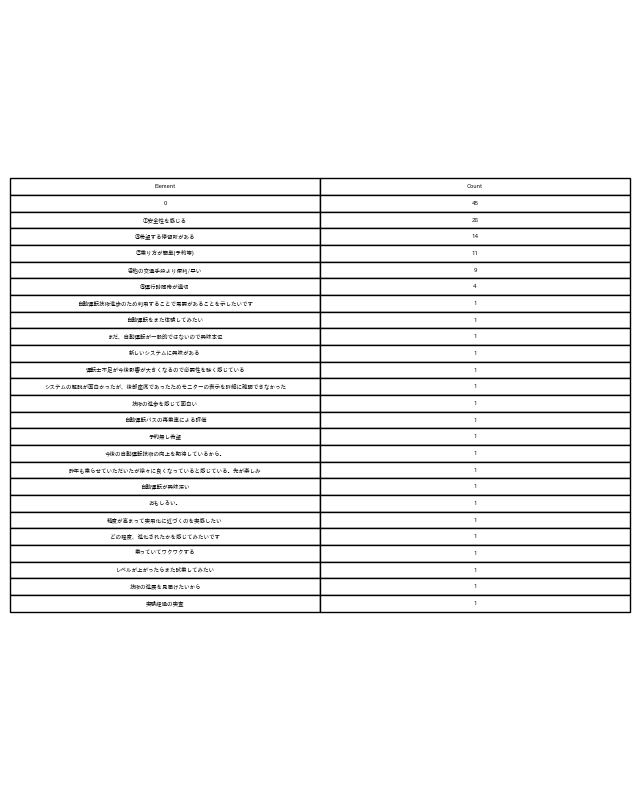

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# 7列目のデータを取得し、NaNを除去
column_data = df.iloc[:, 7].dropna()

# 各セルのデータを";"で分割し、リストとして展開
all_elements = [item.strip() for sublist in column_data.astype(str).str.split(";") for item in sublist]

# 出現回数をカウント
element_counts = Counter(all_elements)

# 結果をDataFrameに変換
count_df = pd.DataFrame(element_counts.items(), columns=['Element', 'Count']).sort_values(by='Count', ascending=False)
count_df = count_df.dropna()

# 表を画像として保存
fig, ax = plt.subplots(figsize=(8, len(count_df) * 0.4))  # データの行数に応じた高さ調整
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=count_df.values, colLabels=count_df.columns, cellLoc='center', loc='center')

# 画像を保存
plt.savefig(r"C:\Users\sk062\OneDrive\デスクトップ\A.png", dpi=300, bbox_inches='tight')
plt.show()


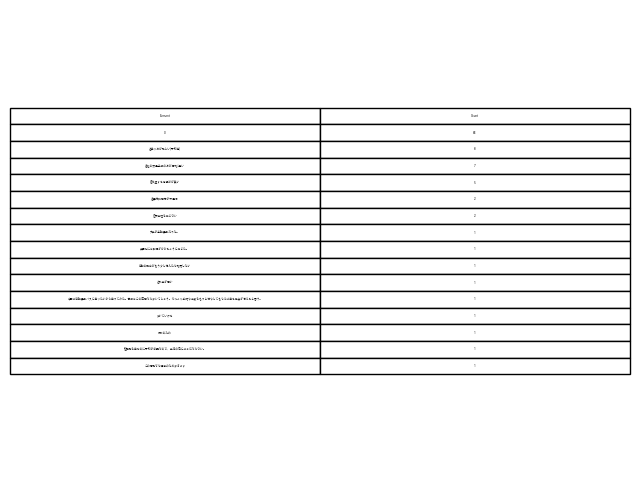

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# 7列目のデータを取得し、NaNを除去
column_data_2 = df.iloc[:, 8].dropna()

# 各セルのデータを";"で分割し、リストとして展開
all_elements_2 = [item.strip() for sublist in column_data_2.astype(str).str.split(";") for item in sublist]

# 出現回数をカウント
element_counts_2 = Counter(all_elements_2)

# 結果をDataFrameに変換
count_df_2 = pd.DataFrame(element_counts_2.items(), columns=['Element', 'Count']).sort_values(by='Count', ascending=False)
count_df_2 = count_df_2.dropna()

# 表を画像として保存
fig, ax = plt.subplots(figsize=(8, len(count_df_2) * 0.4))  # データの行数に応じた高さ調整
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=count_df_2.values, colLabels=count_df_2.columns, cellLoc='center', loc='center')

# 画像を保存
plt.savefig(r"C:\Users\sk062\OneDrive\デスクトップ\A_2.png", dpi=300, bbox_inches='tight')
plt.show()


In [46]:
count_df

,Element,Count
0,0,45
3,①安全性を感じる,28
1,③希望する停留所がある,14
4,②乗り方が簡単(予約等),11
2,④他の交通手段より便利/早い,9
11,⑤運行時間帯が適切,4
15,自動運転技術進歩のため利用することで需要があることを示したいです,1
23,自動運転をまた体験してみたい,1
22,まだ、自動運転が一般的ではないので興味本位,1
21,新しいシステムに興味がある,1


In [48]:
count_df_2

,Element,Count
2,0,83
6,③乗り方が難しい(予約等),8
3,⑤他の交通手段の方が便利/早い,7
7,④希望する停留所が無い,5
8,⑥運行時間帯が不適切,2
9,①安全性を感じない,2
0,大半が手動運転だった。,1
1,実証化には時間がかかるように感じた。,1
4,自動の割合がもう少し増えたら利用したい,1
5,②料金が高い,1
